# To run the codes, just simply run all

#Setup
This step clones my github repository to get the HW1_data

In [1]:
!git clone https://github.com/dylantzx/Machine-Learning.git

Cloning into 'Machine-Learning'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (17/17), done.


Changes into the HW1_data directory


In [2]:
!pwd
%cd /content/Machine-Learning/HW_1/HW1_data  
!ls # You should be able to see 1 2 3

/content
/content/Machine-Learning/HW_1/HW1_data
1  2  3


In [3]:
# necessary imports
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import io
import random

# Question 1 [Classification]

Consider data points from a 2-d space where each point is of the form x = (x1, x2). You are given a dataset with two positive examples: (1, 1) and (2, 2), and two negative examples (-1, 1) and (1, -1). For each of the following hypothesis spaces, find the parameters of a classifier (a member of the hypothesis space) that can correctly classify all the examples in the dataset, or explain why no such classifier exists.

(a) [10 points] Inside or outside of an origin-centered circle with radius r (r is the parameter).

(b) [10 points] Above or below a line through the origin with normal vector θ = (θ1,θ2) (or
[θ1, θ2]T ).


# Question 1 Answer
a) No such classifer exists. This is because the distance of points (1,1), (1,-1) and (-1,1) from the origin, are all the same. This means that if a circle is used as the classifer, either all points are inside the circle, outside the circle, or would lie on the boundary itself. Hence, it would be impossible to separate the 3 points into 2 different classes with a given radius r, and no such classifer exists.

b) No such classifer exists. Both the points (-1,1) and (1,-1) belong to the same class. If a line y = -x that passes through the origin is drawn, we can see that both the points (-1,1) and (1,-1) will lie on the line itself. Hence, if the gradient of the graph decreases or increases a bit (eg. y= -1.1x or y= -0.9x) , it will always separate the 2 points into 2 separate classes and not classify them into the same class. Hence, there would be no such boundary line that can pass through the origin, yet have them be of the same class.

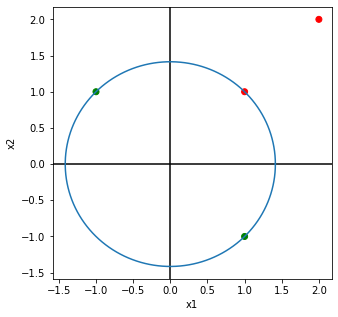

In [4]:
x1 = [1,2,-1,1]
x2 = [1,2,1,-1]
y = [1,1,-1,-1]

plt.figure(figsize=(5,5))
plt.scatter(x1, x2, c=["red" if y[i] == 1 else 'green' for i in range(len(y))])
plt.xlabel("x1")
plt.ylabel("x2")
plt.axhline(0,color='black')
plt.axvline(0,color='black')

angle = np.linspace( 0 , 2 * np.pi , 150 ) 
 
radius = math.sqrt(2)
 
circle_x = radius * np.cos( angle ) 
circle_y = radius * np.sin( angle )
plt.plot(circle_x,circle_y)
 

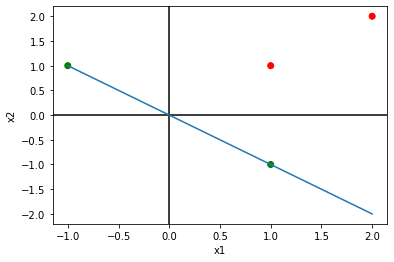

In [5]:
x1 = [1,2,-1,1]
x2 = [1,2,1,-1]
y = [1,1,-1,-1]

plt.scatter(x1, x2, c=["red" if y[i] == 1 else 'green' for i in range(len(y))])
plt.xlabel("x1")
plt.ylabel("x2")
plt.axhline(0,color='black')
plt.axvline(0,color='black')

x = np.linspace(-1,2,100)
line= -1*x
plt.plot(x, line)

# Question 2 [Linear classification]
Automatic handwritten digit recognition is an important machine learning task. The US Postal Ser- vice Zip Code Database (http://www.unitedstateszipcodes.org/zip-code-database/) provides 16 × 16 pixel images preprocessed from scanned handwritten zip codes (US zip codes are the analogues of Singapore postal codes). The task is to recognize the digit in each image. We shall consider the simpler goal of recognizing only two digits: 1 and 5. To simplify our task even further, let’s consider only two features: intensity and symmetry. Digit 5 generally occupies more black pixels and thus have higher average pixel intensity than digit 1. Digit 1 is usually symmetric but digit 5 is not. By defining asymmetry as the average difference between an image and its flipped versions, and symmetry as the negation of asymmetry, we can get higher symmetry values for digit 1.

Write an implementation of the perceptron algorithm. Train it on the training set (train 1 5.csv), and evaluate its accuracy on the test set (test 1 5.csv). The training and test sets are posted
on eDimension. csv stands for comma-separated values. In the files, each row is an example. The
first value is the symmetry, the second is the average intensity, and the third is the label.

**Note: please do NOT shuffle the data. Visit the instances sequentially in the training set when running the perceptron algorithm.**

(a) [5 points] Run the perceptron algorithm with offset on the training data for 1 epoch (i.e., traversing the training set 1 time), report the θ, offset and accuracy on the test set.

(b) [5 points] Run the perceptron algorithm with offset on the training data for 5 epochs, report the θ, offset and accuracy on the test set.

(c) [10 points] Submit your code together with crystal clear instructions to run the code. The code must be ready to run code without requiring any changes. The TA will follow the instructions to run your code and grade accordingly.

# Question 2 Answer
a)

Weight: [-2.51402919 -6.06354853]

Offset: 0.0

Accuracy: 0.9660678642714571

b)

Weight: [-2.05719114 -9.15769946]

Offset: 1.0

Accuracy: 0.9710578842315369


#Question 2a

In [6]:
%cd 1
!ls

/content/Machine-Learning/HW_1/HW1_data/1
test_1_5.csv  train_1_5.csv


In [7]:
trg_set_1_5 = pd.read_csv('train_1_5.csv', names=["Symmetry", "Average Intensity", "Label"])
test_set_1_5 = pd.read_csv('test_1_5.csv', names=["Symmetry", "Average Intensity", "Label"])

In [8]:
print(f"Training set:")
print(trg_set_1_5)
print("\n")
print(f"Test set:")
print(test_set_1_5)

Training set:
     Symmetry  Average Intensity  Label
0   -0.725767           0.022763    1.0
1   -0.811273           0.035524    1.0
2   -0.763794           0.018471    1.0
3   -0.720302           0.056489    1.0
4   -0.315630           0.489584   -1.0
..        ...                ...    ...
978 -0.710613           0.131068    1.0
979 -0.456188           0.109599    1.0
980 -0.638576           0.060313    1.0
981 -0.504181           0.457274   -1.0
982 -0.582545           0.260452   -1.0

[983 rows x 3 columns]


Test set:
      Symmetry  Average Intensity  Label
0    -0.551897           0.071675    1.0
1    -0.752347           0.040738    1.0
2    -0.736452           0.087617    1.0
3    -0.718523           0.072174    1.0
4    -0.681187           0.044814    1.0
...        ...                ...    ...
997  -0.443863           0.431838   -1.0
998  -0.435269           0.271380   -1.0
999  -0.560837           0.319905   -1.0
1000 -0.356053           0.470353   -1.0
1001 -0.743952     

In [9]:
# Convert to numpy array
trg_samples = trg_set_1_5[["Symmetry","Average Intensity"]].to_numpy()
labels = trg_set_1_5["Label"].to_list()

test_samples = test_set_1_5[["Symmetry","Average Intensity"]].to_numpy()
test_labels = test_set_1_5["Label"].to_list()

print(f"1st trg sample: {trg_samples[0]}")
print(f"1st trg label: {labels[0]}")

print(f"1st test sample: {test_samples[0]}")
print(f"1st test label: {test_labels[0]}")

1st trg sample: [-0.72576667  0.02276306]
1st trg label: 1.0
1st test sample: [-0.55189662  0.07167544]
1st test label: 1.0


# Visualize data

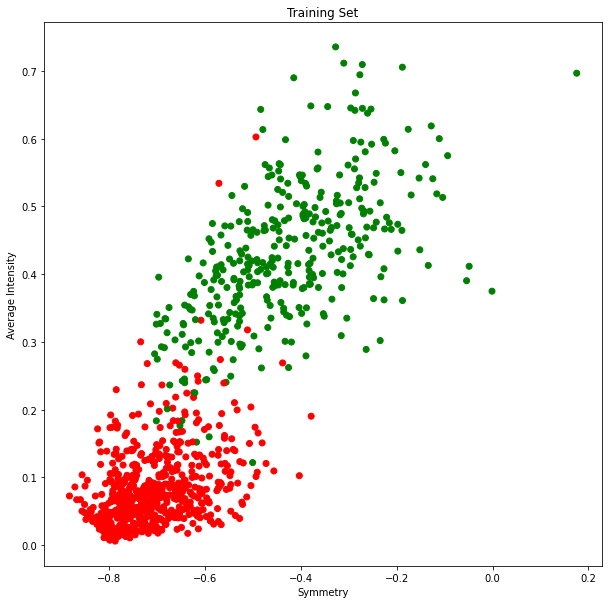

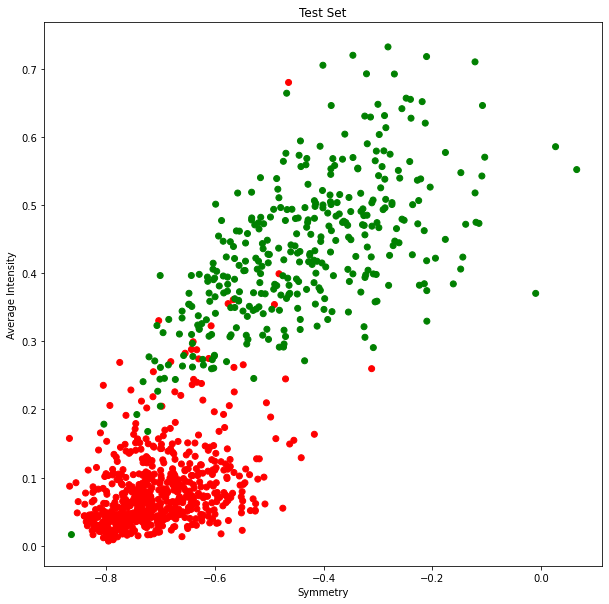

In [10]:
def viz_data(x, y, labels, title=None):
  colors=["red" if labels[i] == 1 else 'green' for i in range(len(labels))]
  plt.figure(figsize=(10,10))
  plt.scatter(x, y, c=colors)

  plt.xlabel("Symmetry")
  plt.ylabel("Average Intensity")
  plt.title(title)

viz_data(trg_samples[:,0], trg_samples[:,1], labels, title="Training Set")
viz_data(test_samples[:,0], test_samples[:,1], test_labels, title="Test Set")

In [11]:
def update(weight, offset, point, label):
  weight = weight + label * point
  offset = offset + label
  return weight, offset

def predict(weight, offset, point):
  pred_val = np.dot(weight,point) + offset

  if pred_val >= 0:
    pred_class = 1
  else:
    pred_class = -1

  return pred_class

def cal_training_error(weight, offset, trg_samples, labels):
  err = 0
  for index, trg_sample in enumerate(trg_samples):
    pred_class = predict(weight, offset, trg_sample)
    if pred_class != labels[index]:
      err+=1

  return err/len(labels)

In [12]:
def train(trg_samples, labels, epochs=1):
  print("-----TRAINING-----")

  # Initialize weight and offset
  weight = np.array([0,0])
  offset = 0
  # print(f"Initialized weight: {weight}")
  # print(f"Initialized offset: {offset}") 

  for epoch in range(epochs):
    print(f"[epoch {epoch+1}] ----------->", end = " ")
    for index, trg_sample in enumerate(trg_samples):
      # print(index, trg_sample, labels[index])
      pred_class = predict(weight, offset, trg_sample)

      if pred_class != labels[index]:
        weight, offset = update(weight, offset, trg_sample, labels[index])

    trg_err = cal_training_error(weight, offset, trg_samples, labels)
    print(f"trg error = {trg_err}, acc = {1-trg_err}")

  print("-----TRAIN END-----")
  print(f"Weight: {weight}, Offset: {offset}\n")
  return weight, offset

In [13]:
def test(weight, offset, test_samples, test_labels):
  print("-----TEST RESULTS-----")

  test_err = cal_training_error(weight, offset, test_samples, test_labels)
  
  print(f"Weight: {weight}")
  print(f"Offset: {offset}")
  print(f"Accuracy: {1-test_err}")

In [14]:
weight, offset = train(trg_samples, labels, epochs=1)

-----TRAINING-----
[epoch 1] -----------> trg error = 0.024415055951169887, acc = 0.9755849440488301
-----TRAIN END-----
Weight: [-2.51402919 -6.06354853], Offset: 0.0



In [15]:
test(weight, offset, test_samples, test_labels)

-----TEST RESULTS-----
Weight: [-2.51402919 -6.06354853]
Offset: 0.0
Accuracy: 0.9660678642714571


# Question 2b

In [16]:
weight, offset = train(trg_samples, labels, epochs=5)

-----TRAINING-----
[epoch 1] -----------> trg error = 0.024415055951169887, acc = 0.9755849440488301
[epoch 2] -----------> trg error = 0.026449643947100712, acc = 0.9735503560528993
[epoch 3] -----------> trg error = 0.0508646998982706, acc = 0.9491353001017294
[epoch 4] -----------> trg error = 0.11597151576805696, acc = 0.884028484231943
[epoch 5] -----------> trg error = 0.024415055951169887, acc = 0.9755849440488301
-----TRAIN END-----
Weight: [-2.05719114 -9.15769946], Offset: 1.0



In [17]:
test(weight, offset, test_samples, test_labels)

-----TEST RESULTS-----
Weight: [-2.05719114 -9.15769946]
Offset: 1.0
Accuracy: 0.9710578842315369


# Question 3 [Linear and polynomial regression]
For this exercise, you will experiment with linear and polynomial (in features) regression on a given data set. The inputs are in the file hw1x.dat and the desired outputs in hw1y.dat. Load the data and add a column vector of 1s to the inputs.

(a) [10 points] Write a function implementing the closed form linear regression formula dis- cussed in class to obtain the weight vector θ and report it. Plot both the linear regression line and the data on the same graph. Write a function that will evaluate the training error in terms of empirical risk of the resulting fit and report the error.

(b) [20 points] Write a function to calculate the weight vector θ using batch gradient descent algorithm (where batch size is equal to number of training examples). Consider learning rate as η = 0.01, update θ and calculate the training error (empirical risk) for the batched data, 5 times. Report θ for the minimum training error, the minimum training error itself and plot the linear regression line along with the data on the same graph. Repeat the same with stochastic gradient descent algorithm for 5 epochs (i.e. random sampling with replacement for 5 x number of training examples).

(c) [10 points] Write a function called PolyRegress(x,y,d) which adds the features x2, x3, ...xd to the inputs and performs polynomial regression using closed form solution. Use your function to get a quadratic fit of the data. Plot the data and the fit. Report the training error. Repeat the same for 3rd order fit to 15th order fit. After which order fit does the error get worse?

# Question 3 Answer
a)

Theta = [1.78157138 3.2447227 ]

Training error is 0.5812605752543938

b)

**Batched Gradient Descent:**

theta for min training error: [0.27032973 0.24127422]

min training error: 11.187248930078471


**Stochastic Gradient Descent:**

theta for min training error: [1.72032442 3.10337337]

min training error: 0.5821847408554706

c)

**d=2**

Theta = [0.78341361 0.49659591 3.58076915]

Training error for d=2: 0.5703016121648223

**3<= d <=15**

Training error for d=3: 0.570084436469135

Training error for d=4: 0.5646163879286423

Training error for d=5: 0.5638968184749197

Training error for d=6: 0.561343303890297

Training error for d=7: 0.5562352515819071

Training error for d=8: 0.5537805800963249

Training error for d=9: 0.5529231219511032

Training error for d=10: 0.5526082481096529

Training error for d=11: 0.5618565815047082

Training error for d=12: 17.34775302464444

Training error for d=13: 238.4666531212711

Training error for d=14: 6.950033969197664

Training error for d=15: 1.6761902214872106

The error got worst at order fit 12



# Question 3a

In [18]:
 %cd ../2
 !ls

/content/Machine-Learning/HW_1/HW1_data/2
hw1x.dat  hw1y.dat


In [19]:
hw1x = pd.read_csv('hw1x.dat', names=["Feature 1"])
hw1y =pd.read_csv('hw1y.dat', names=["Response"])
print(hw1x)
print(hw1y)

     Feature 1
0         0.01
1         0.02
2         0.03
3         0.04
4         0.05
..         ...
195       1.96
196       1.97
197       1.98
198       1.99
199       2.00

[200 rows x 1 columns]
     Response
0    3.557667
1    4.873885
2    0.801153
3    3.942173
4    3.418765
..        ...
195  7.746063
196  8.466977
197  7.426914
198  6.770287
199  7.625190

[200 rows x 1 columns]


In [20]:
hw1x["Offset"] = 1
print(hw1x)

     Feature 1  Offset
0         0.01       1
1         0.02       1
2         0.03       1
3         0.04       1
4         0.05       1
..         ...     ...
195       1.96       1
196       1.97       1
197       1.98       1
198       1.99       1
199       2.00       1

[200 rows x 2 columns]


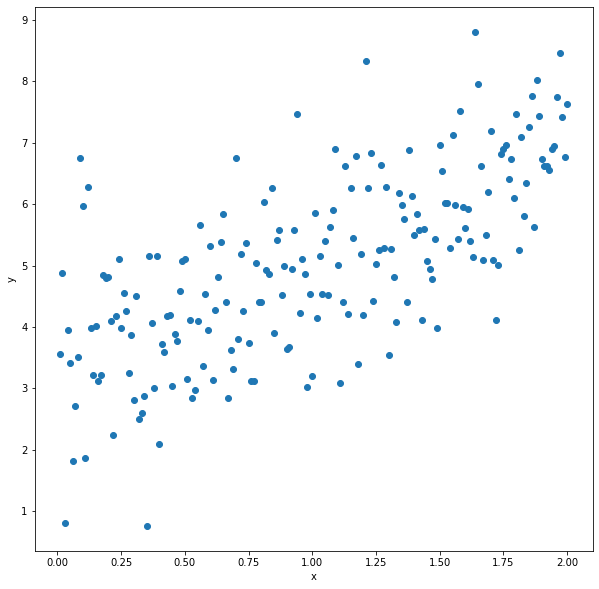

In [21]:
def viz_plot(x, y):
  plt.figure(figsize=(10,10))
  plt.scatter(x, y)
  plt.xlabel("x")
  plt.ylabel("y")

viz_plot(hw1x["Feature 1"], hw1y)

In [22]:
def cf_linear_regression(x, y):

  x_vec = x.to_numpy()
  x_vec_t = np.transpose(x_vec)
  y_vec = y.to_numpy()

  b= np.matmul(x_vec_t,y_vec) / len(y)
  # print(f"b:\n{b}\n")

  A=np.matmul(x_vec_t,x_vec) / len(y)
  # print(f"Matrix A:\n{A}\n")

  return np.matmul(np.linalg.inv(A),b)

def cal_trg_error(theta, x, y):
  theta_t = np.transpose(theta)
  err = 0
  size = len(y)
  for i in range(size):
    _y = y.to_numpy()[i]
    _x = x.to_numpy()[i]
    theta_x = np.matmul(theta_t, _x)
    err += math.pow(_y - theta_x , 2)

  err /= (2*size)
  return err

In [23]:
theta = cf_linear_regression(hw1x, hw1y)
print(f"theta:\n{theta}\n")

theta:
[[1.78157138]
 [3.2447227 ]]



In [24]:
trg_err = cal_trg_error(theta, hw1x, hw1y)
print(f"Training error is {trg_err}")

Training error is 0.5812605752543938


[[1.78157138 3.2447227 ]]


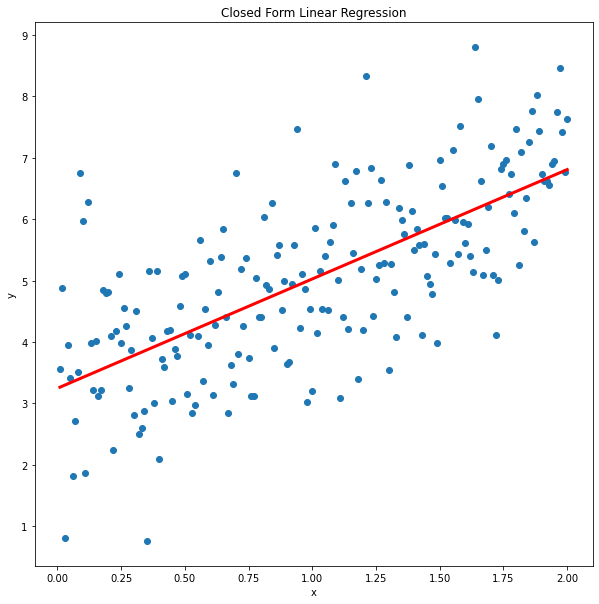

In [25]:
def viz_model(theta, hw1x, hw1y, title=None):
  theta_t = np.transpose(theta)
  print(theta_t)

  x_vec = hw1x.to_numpy()
  viz_plot(hw1x["Feature 1"], hw1y)
  plt.plot(hw1x["Feature 1"], [np.matmul(theta_t,x_vec[i]) for i in range(len(hw1y))], color="red", linewidth=3)
  plt.title(title)

viz_model(theta, hw1x, hw1y, "Closed Form Linear Regression")

# Question 3b

In [26]:
def cal_derv_emp_risk(x, y, theta, size):
  derv_emp_risk = np.zeros(2)
  for i in range(size):
    theta_t = np.transpose(theta)
    par_derivative = -(y[i] - np.matmul(theta_t, x[i])) * x[i]
    derv_emp_risk += par_derivative

  derv_emp_risk /= size
  return derv_emp_risk

def batch_grad_desc(x, y, batch_size, epochs=1, lr=0.01):
  print("-----TRAINING-----")
  _x = x.to_numpy()
  _y = y.to_numpy()
  
  size = batch_size
  theta = np.zeros(2)

  min_trg_error = 100
  best_theta = theta

  for epoch in range(epochs):
    print(f"[Epoch {epoch + 1}] ------ ", end=" ")
    derv_emp_risk = cal_derv_emp_risk(_x, _y,theta, size)
    theta -= lr * derv_emp_risk
    err = cal_trg_error(theta, x, y)
    print(f"Training error: {err}")
    if err <= min_trg_error:
      best_theta = theta
      min_trg_error = err
      
  print("-----TRAIN END-----")
  print(f"theta for min training error: {best_theta}")
  print(f"min training error: {min_trg_error}")
  return best_theta
  
def stoc_grad_desc(x, y, times_to_sample, epochs=1, lr=0.01):
  print("-----TRAINING-----")
  _x = x.to_numpy()
  _y = y.to_numpy()

  size = len(y)
  random.seed(1)

  theta = np.zeros(2)

  min_trg_error = 100
  best_theta = theta

  for epoch in range(epochs):
    print(f"[Epoch {epoch + 1}] ------ ", end=" ")
    for i in range(times_to_sample):
      rand_indx = random.randint(0,size-1)
      rand_x = _x[rand_indx]
      rand_y = _y[rand_indx]
      theta += lr *(rand_y - np.matmul(np.transpose(theta), rand_x))*rand_x

    err = cal_trg_error(theta, x, y)
    print(f"Training error: {err}")
    if err <= min_trg_error:
      best_theta = theta
      min_trg_error = err
      
  print("-----TRAIN END-----")
  print(f"theta for min training error: {best_theta}")
  print(f"min training error: {min_trg_error}")
  return best_theta

In [27]:
theta = batch_grad_desc(hw1x, hw1y, len(hw1y), epochs=5)

-----TRAINING-----
[Epoch 1] ------  Training error: 13.219917694196361
[Epoch 2] ------  Training error: 12.677517326806719
[Epoch 3] ------  Training error: 12.158610566668763
[Epoch 4] ------  Training error: 11.662179145218188
[Epoch 5] ------  Training error: 11.187248930078471
-----TRAIN END-----
theta for min training error: [0.27032973 0.24127422]
min training error: 11.187248930078471


[0.27032973 0.24127422]


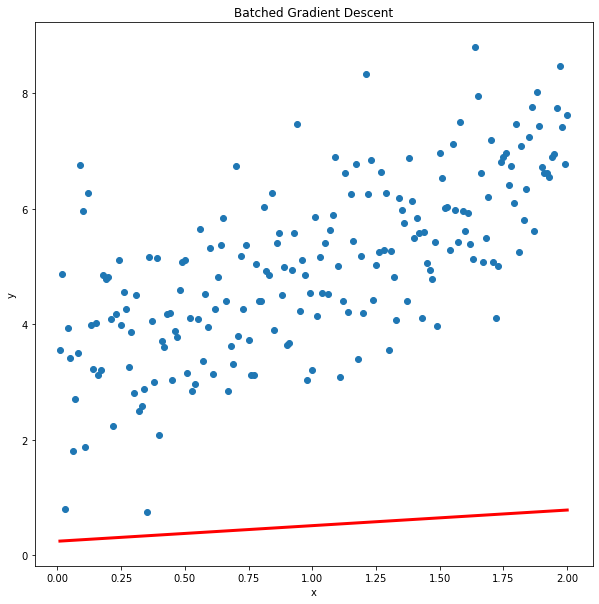

In [28]:
viz_model(theta, hw1x, hw1y, "Batched Gradient Descent")

In [29]:
theta = stoc_grad_desc(hw1x, hw1y, 5*len(hw1y), epochs=5)

-----TRAINING-----
[Epoch 1] ------  Training error: 0.5917485827277419
[Epoch 2] ------  Training error: 0.5851055351729582
[Epoch 3] ------  Training error: 0.5821847408554706
[Epoch 4] ------  Training error: 0.6181473720168575
[Epoch 5] ------  Training error: 0.6024704764095454
-----TRAIN END-----
theta for min training error: [1.72032442 3.10337337]
min training error: 0.5821847408554706


[1.72032442 3.10337337]


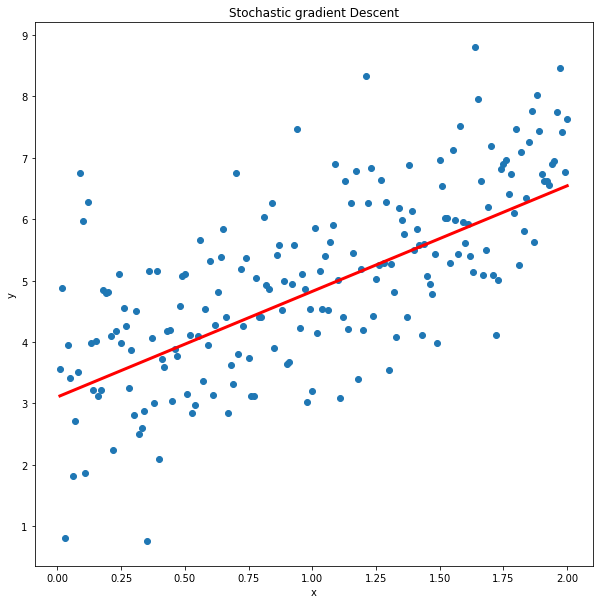

In [30]:
viz_model(theta, hw1x, hw1y, "Stochastic gradient Descent")

# Question 3c

In [31]:
def PolyRegress(x,y,d):

  for i in range(2,d+1):
    x.insert(loc=i-1, column=f"Feature {i}", value=x["Feature 1"] ** i)
  # print(x)

  x_vec = x.to_numpy()
  x_vec_t = np.transpose(x_vec)
  y_vec = y.to_numpy()

  b= np.matmul(x_vec_t,y_vec) / len(y)
  # print(f"b:\n{b}\n")

  A=np.matmul(x_vec_t,x_vec) / len(y)
  # print(f"Matrix A:\n{A}\n")

  theta = np.matmul(np.linalg.inv(A),b)

  return theta, x

In [32]:
theta, new_x = PolyRegress(hw1x.copy(), hw1y.copy(), 2)
print(f"theta:\n{theta}\n")

theta:
[[0.78341361]
 [0.49659591]
 [3.58076915]]



In [33]:
trg_err = cal_trg_error(theta, new_x, hw1y)
print(f"Training error for d=2: {trg_err}")

Training error for d=2: 0.5703016121648223


[[0.78341361 0.49659591 3.58076915]]


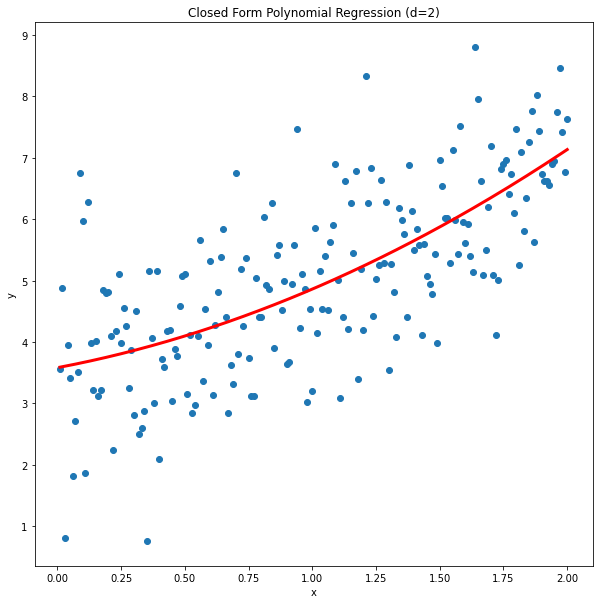

In [34]:
viz_model(theta, new_x, hw1y, "Closed Form Polynomial Regression (d=2)")

In [35]:
min_trg_err = 100
theta_dic = {}
new_x_dic = {}

for i in range(3,16):
  theta, new_x = PolyRegress(hw1x.copy(), hw1y.copy(), i)
  trg_err = cal_trg_error(theta, new_x, hw1y)
  print(f"Training error for d={i}: {trg_err}")
  theta_dic[i] = theta
  new_x_dic[i] = new_x

Training error for d=3: 0.570084436469135
Training error for d=4: 0.5646163879286423
Training error for d=5: 0.5638968184749197
Training error for d=6: 0.561343303890297
Training error for d=7: 0.5562352515819071
Training error for d=8: 0.5537805800963249
Training error for d=9: 0.5529231219511032
Training error for d=10: 0.5526082481096529
Training error for d=11: 0.5618565815047082
Training error for d=12: 17.34775302464444
Training error for d=13: 238.4666531212711
Training error for d=14: 6.950033969197664
Training error for d=15: 1.6761902214872106


Ans: The error got worst at order fit 12

[[1.11846512 0.08090267 0.13787504 3.52394943]]
[[-2.09126966  7.22513464 -5.38187521  1.3730722   3.85376334]]
[[-0.1354222   0.48154349  3.53113473 -3.60926334  0.99150956  3.7181433 ]]
[[  5.56010884 -27.43134431  58.72902194 -54.95621233  23.44890137
   -3.72427725   3.43194652]]
[[  17.31146673 -104.72227836  270.37451202 -343.1908437   229.48681974
   -77.69332841   10.51443514    2.98164469]]
[[  28.70155311 -201.17796473  617.80952486 -987.05876566  893.3673986
  -462.31679859  127.58359358  -14.56083963    2.6357557 ]]
[[   37.81839885  -297.49979508  1057.64473653 -2044.14859533
   2358.24295998 -1673.33378363   716.84146547  -170.20103848
     17.20729022     2.40961175]]
[[   30.28032887  -200.58874321   512.41678619  -402.5317688
   -560.93847656  1539.88604736 -1495.76171875   757.21852112
   -199.11006165    21.52280354     2.56612955]]
[[-2.10200577e+01  5.86943970e+02 -4.81434424e+03  1.91313340e+04
  -4.36174219e+04  6.17816172e+04 -5.62631562e+04  3.29996172e+04
  -1

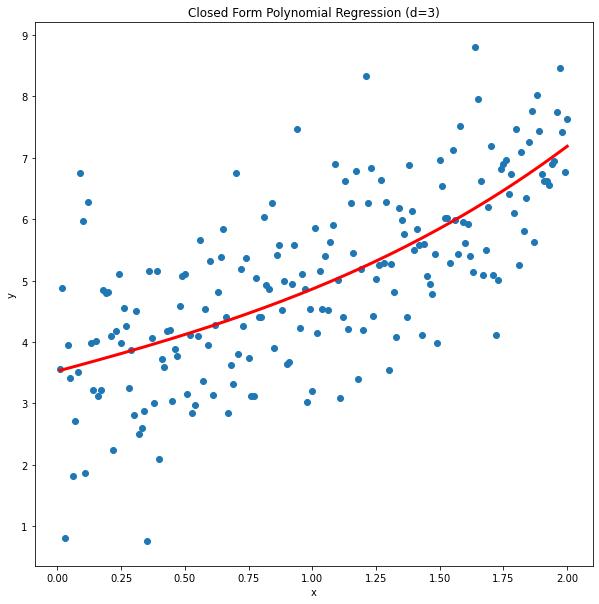

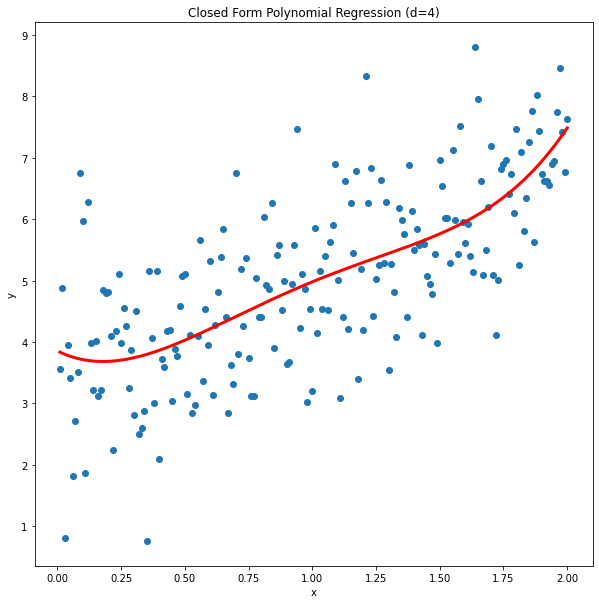

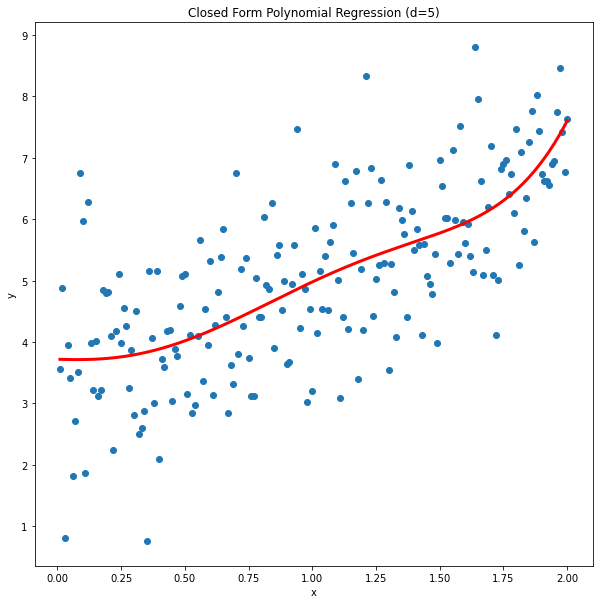

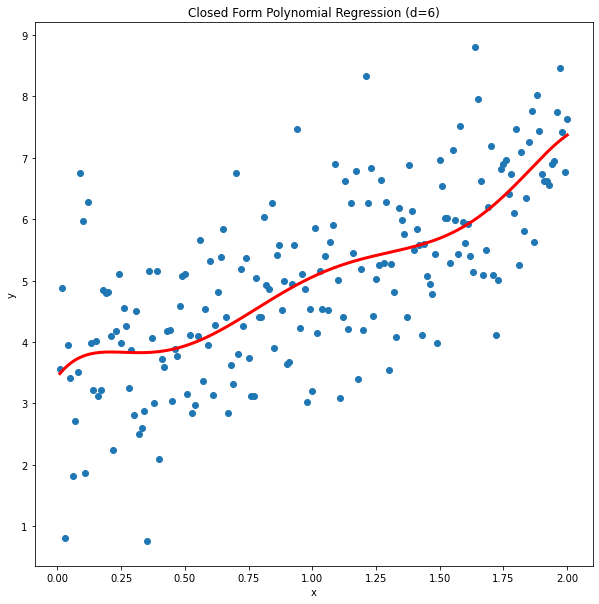

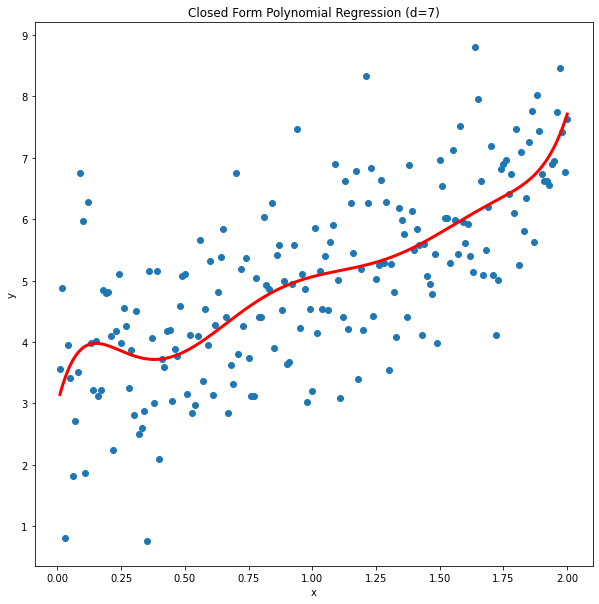

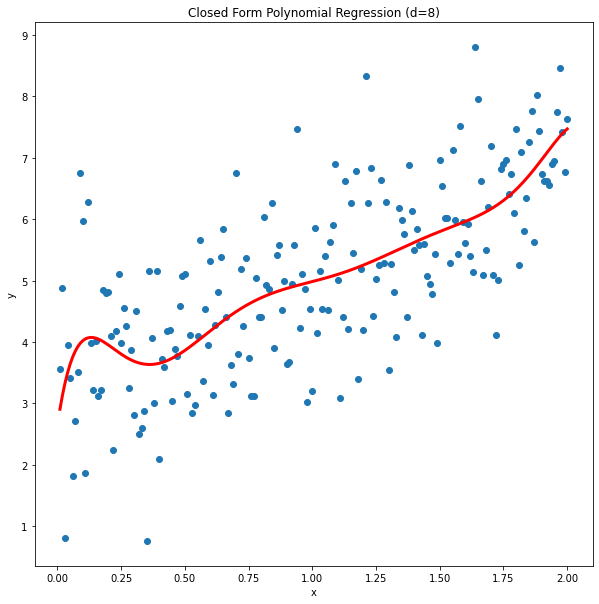

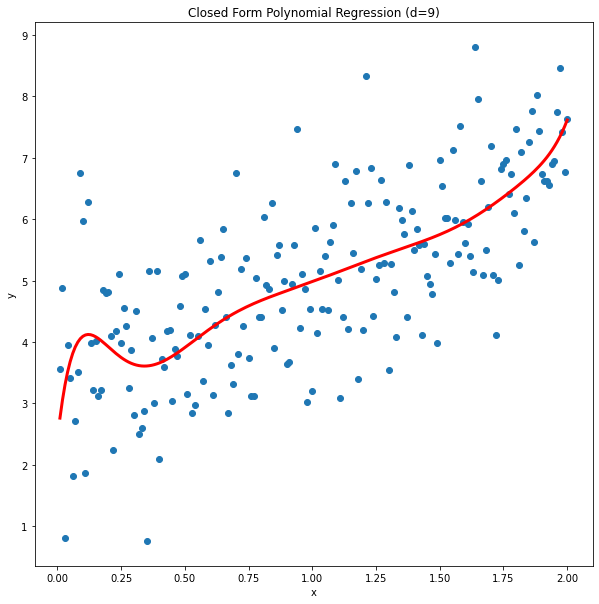

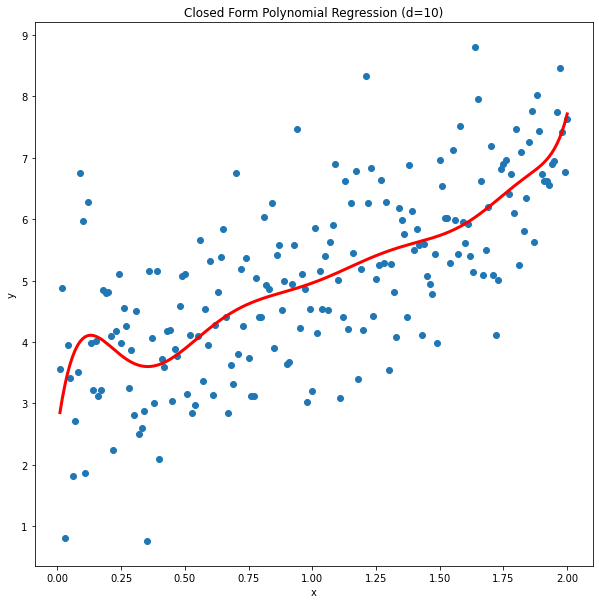

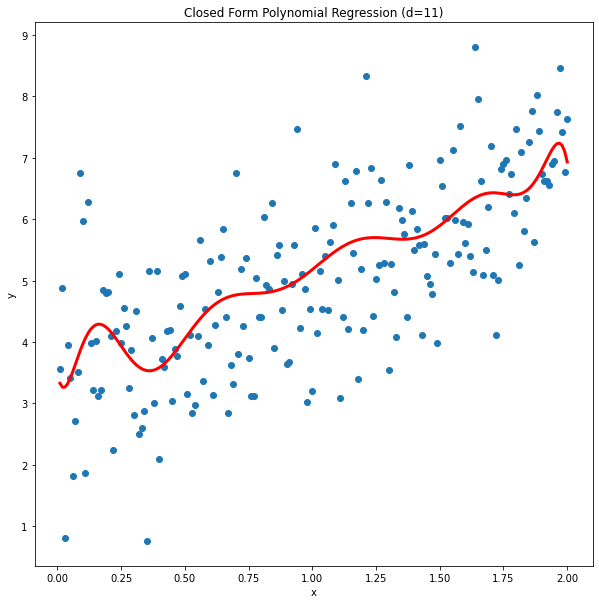

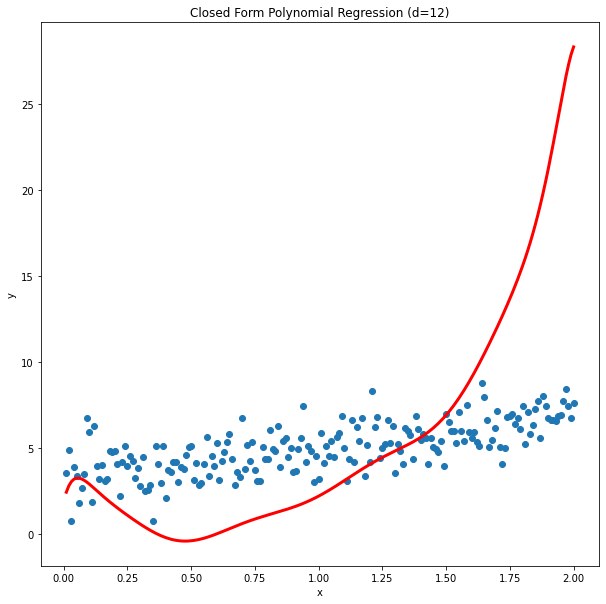

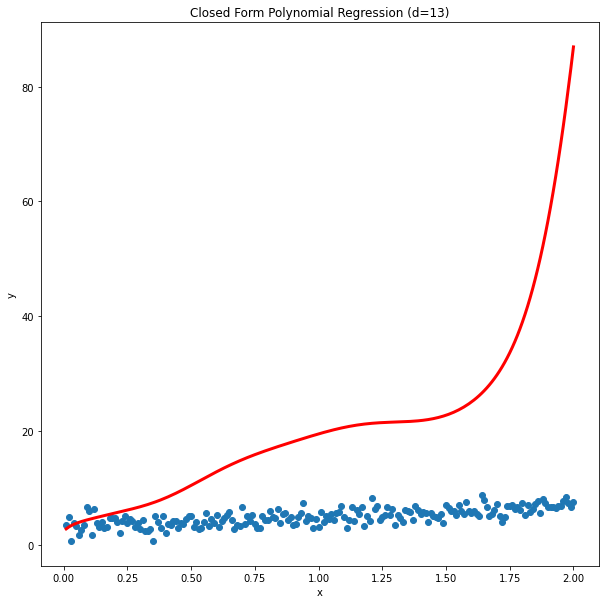

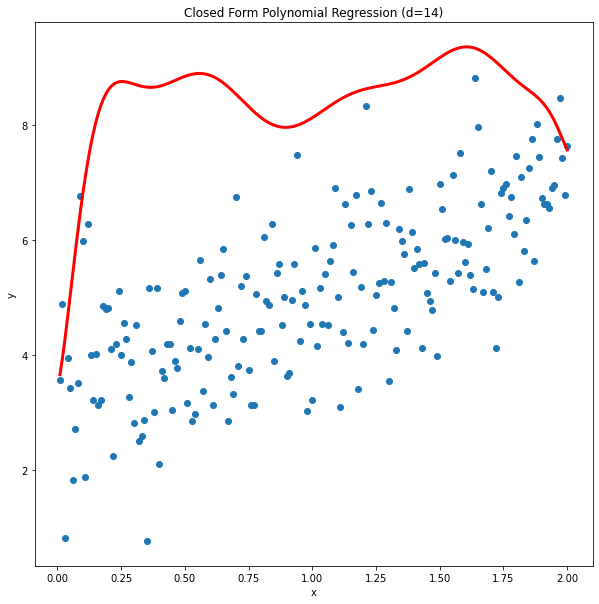

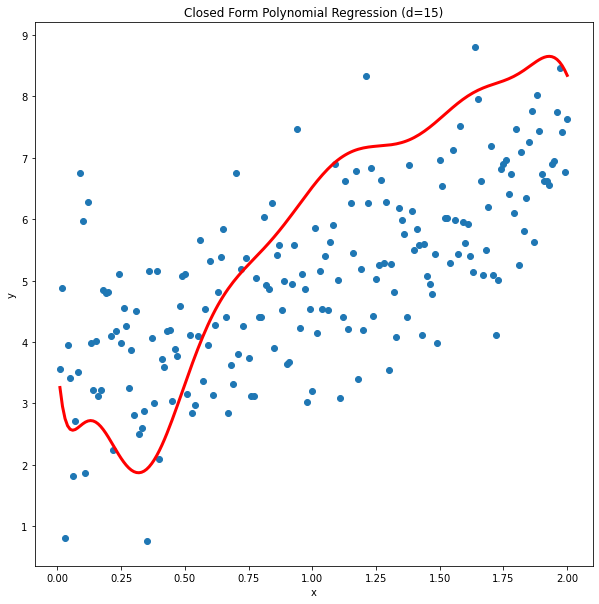

In [36]:
for i in range(3,16):
  viz_model(theta_dic[i], new_x_dic[i], hw1y, f"Closed Form Polynomial Regression (d={i})")

# Question 4 [Ridge regression]
In this problem, we will explore the effects of ridge regression on generalization. We will use hw1 ridge x.dat as the inputs and hw1 ridge y.dat as the desired output. Please note that a column vector of 1s is already added to the inputs. Recall from Lecture Notes 4, the optimal weight for ridge regression is given by

θˆ = (nλI + XT X)−1XT Y (1)

To find a suitable value for λ, we will set aside a small subset of the provided data set for estimating the test loss. This subset is called validation set, which we use to compute validation loss. The remainder of the data will be called the training set. Let the first 10 entries of the data set be the validation set, and the last 40 entries be the training set. Concatenate their features into matrices vX and tX, and their responses into vectors vY and tY.

(a) [10 points] Write a function ridge regression(tX, tY, l) that takes the training features, train- ing responses and regularizing parameter λ, and outputs the exact solution θ for ridge regres- sion. Report the resulting value of θ for λ = 0.15.

(b) [10 points] Use the following code to plot graphs of the validation loss and training loss as λ varies on logarithmic scale from λ = 10−5 to λ = 100. Write down the value of λ that minimizes the validation loss.


# Question 4 Answer

a)

theta: [-0.57939825 1.15033028 0.04934122 -1.59867896]

b)

regularization parameter that minimizes validation loss = 0.01259


# Question 4a

In [37]:
 %cd ../3
 !ls

/content/Machine-Learning/HW_1/HW1_data/3
hw1_ridge_x.dat  hw1_ridge_y.dat


In [38]:
hw1_ridge_x = pd.read_csv('hw1_ridge_x.dat', names=["Feature 1", "Feature 2", "Feature 3", "Offset"])
hw1_ridge_y =pd.read_csv('hw1_ridge_y.dat', names=["Response"])
print(hw1_ridge_x.head())
print(hw1_ridge_y.head())

   Feature 1  Feature 2  Feature 3  Offset
0  -1.477524  -0.050253  -0.170236       1
1   0.907090   0.664516   0.478651       1
2   0.400322   0.432674  -0.435048       1
3  -1.653651   0.126796   1.002368       1
4  -1.066913  -0.838428  -0.348881       1
   Response
0 -1.139331
1 -1.389563
2 -1.464279
3 -0.771402
4 -2.454519


In [39]:
vX = hw1_ridge_x.head(10).to_numpy()
vY = hw1_ridge_y.head(10).to_numpy()

tX = hw1_ridge_x.tail(40).to_numpy()
tY = hw1_ridge_y.tail(40).to_numpy()

In [40]:
print(vX)
print(vY)

[[-1.47752373 -0.0502532  -0.17023633  1.        ]
 [ 0.90709037  0.66451566  0.47865149  1.        ]
 [ 0.4003217   0.43267376 -0.43504849  1.        ]
 [-1.65365073  0.126796    1.00236757  1.        ]
 [-1.06691275 -0.83842795 -0.34888078  1.        ]
 [-0.68878191 -0.80913707  0.43642513  1.        ]
 [ 0.35745996  1.13429946  1.56657725  1.        ]
 [ 0.09528788 -2.06401766  1.04123572  1.        ]
 [ 1.23035184  1.61568621  1.48715984  1.        ]
 [-0.83620287  0.07849988  2.13596839  1.        ]]
[[-1.13933054]
 [-1.3895628 ]
 [-1.46427865]
 [-0.77140228]
 [-2.45451924]
 [-2.53173137]
 [-0.58514703]
 [-4.53260862]
 [-0.59382424]
 [-1.38688906]]


In [41]:
print(tX)
print(tY)

[[-0.43319969 -0.63613778 -0.38595494  1.        ]
 [ 0.28831115  0.24175838 -0.16395618  1.        ]
 [-2.13894535  0.97237413  0.10424867  1.        ]
 [ 0.99927052 -1.11433758 -0.45458174  1.        ]
 [ 0.49052428 -0.92271326 -0.35495995  1.        ]
 [ 0.38507689  0.08352817  0.02790376  1.        ]
 [ 0.69112273 -1.00672565 -0.88943049  1.        ]
 [-0.41774901  0.40816784  1.80858458  1.        ]
 [ 0.49400495  1.02792757 -1.00655099  1.        ]
 [ 0.58197659  0.63871748 -1.42460059  1.        ]
 [-0.01784407  0.71766039 -0.61215247  1.        ]
 [ 0.87391878 -1.75733762  0.4195343   1.        ]
 [-0.66181284  0.49298387 -0.04672385  1.        ]
 [ 1.23736049  2.21406654  1.58620271  1.        ]
 [-1.0553783   0.8954994  -1.84451136  1.        ]
 [ 2.30714568  0.25333497 -0.48961114  1.        ]
 [-0.4755072   2.056542    1.57110362  1.        ]
 [ 1.41596994 -0.92738418 -0.05858269  1.        ]
 [ 1.62513334 -1.12246556 -1.09691528  1.        ]
 [ 0.40780549  1.02729963 -0.04

In [42]:
def ridge_regression(tX, tY, l):

  size = len(tY)

  b = np.matmul(np.transpose(tX), tY) 

  A = size*l*np.identity(len(tX[0])) + np.matmul(np.transpose(tX), tX)

  theta = np.matmul(np.linalg.inv(A), b)

  return theta

In [43]:
theta = ridge_regression(tX, tY, 0.15)
print(f"theta: {theta}")

theta: [[-0.57939825]
 [ 1.15033028]
 [ 0.04934122]
 [-1.59867896]]


# Question 4b

min vloss is at index: 19


Text(0, 0.5, 'Loss')

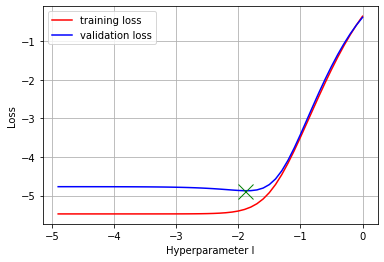

In [44]:
tn = tX.shape[0]
vn = vX.shape[0]
tloss = []
vloss = []

index = -np.arange(0,5,0.1)
for i in index:
  w = ridge_regression(tX, tY, 10**i)
  tloss = tloss + [np.sum((np.dot(tX,w) - tY)**2)/tn/2]
  vloss = vloss + [np.sum((np.dot(vX,w) - vY)**2)/vn/2]

print(f"min vloss is at index: {vloss.index(min(vloss))}")
plt.plot(index, np.log(tloss), 'r', label="training loss")
plt.plot(index, np.log(vloss), 'b', label="validation loss")

plt.plot(-1.9, np.log(vloss[19]), color="g", marker="x", markersize=15)
plt.grid()
plt.legend()
plt.xlabel("Hyperparameter l")
plt.ylabel("Loss")

The regularizing parameter l, that minimizes the validation loss is approximately at -1.9.

Therefore, 
10**(-1.9) = 0.012589